In [2]:
#install packages
install.packages("googlesheets")
install.packages("ggplot2")
install.packages("ggthemes")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependency ‘rlang’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
#import libraries
library(googlesheets)
library(ggplot2)
library(ggthemes)

In [4]:
#create dataframe that automatically links to excel sheet where scores are put in
doc <- gs_title("260 Boston Avenue Free Throw Championship Series")
sheet <- gs_read(ss=doc, skip=1)
df=as.data.frame(sheet)
df=df[19:nrow(df),c('X2','X3','X4','X5','X6','X7')]
colnames(df) = df[1, ]
df = df[-1, ] 

Adding .httr-oauth to .gitignore
Waiting for authentication in browser...
Press Esc/Ctrl + C to abort
Please point your browser to the following url: 
https://accounts.google.com/o/oauth2/auth?client_id=178989665258-f4scmimctv2o96isfppehg1qesrpvjro.apps.googleusercontent.com&scope=https%3A%2F%2Fspreadsheets.google.com%2Ffeeds%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&redirect_uri=http%3A%2F%2Flocalhost%3A1410%2F&response_type=code&state=Hfe2YoqVIx
Authentication complete.
Sheet successfully identified: "260 Boston Avenue Free Throw Championship Series"
Accessing worksheet titled 'Sheet1'.
Warning message:
“Missing column names filled in: 'X1' [1], 'X2' [2], 'X3' [3], 'X4' [4], 'X5' [5], 'X6' [6], 'X7' [7], 'X8' [8]”Parsed with column specification:
cols(
  X1 = col_character(),
  X2 = col_character(),
  X3 = col_character(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_character(),
  X8 = col_character()
)


In [5]:
#sample from each person's score (drop n/a values) and keep track of # of wins
#ties are split evenly between number of people tied for first
winners=c(0,0,0,0,0,0)
winning_number=c(rep(0,10000))
highest_non_winner=c(rep(0,10000))
for (i in 1:10000) {
  a=sample(na.omit(df[['Zach']]),1)
  b=sample(na.omit(df[['Tyler']]),1)
  c=sample(na.omit(df[['Nick']]),1)
  d=sample(na.omit(df[['Nikhil']]),1)
  e=sample(na.omit(df[['Ed']]),1)
  f=sample(na.omit(df[['Oren']]),1)
  all<-c(a,b,c,d,e,f)
  max=max(all)
  second=max(all[all!=max])
  winning_number[i]=max
  highest_non_winner[i]=second
  num_winners=0
  for (j in c(a,b,c,d,e,f)) {
    if (j==max) {num_winners = num_winners+1}
  }
  if (max==a) {winners[1] = winners[1] + 1/num_winners}
  if (max==b) {winners[2] = winners[2] + 1/num_winners}
  if (max==c) {winners[3] = winners[3] + 1/num_winners}
  if (max==d) {winners[4] = winners[4] + 1/num_winners}
  if (max==e) {winners[5] = winners[5] + 1/num_winners}
  if (max==f) {winners[6] = winners[6] + 1/num_winners}
}

Warning message in max(all[all != max]):
“no non-missing arguments, returning NA”

In [6]:
#convert wins into percentage
Rosh=winners[1]/10000
Tyler=winners[2]/10000
Nick=winners[3]/10000
Nikhil=winners[4]/10000
Ed=winners[5]/10000
Oren=winners[6]/10000
percentages<-c(Rosh,Tyler,Nick,Nikhil,Ed,Oren)
names<-c("Rosh","Tyler","Nick","Nikhil","Ed","Oren")
win_percentages<-data.frame(names,percentages)


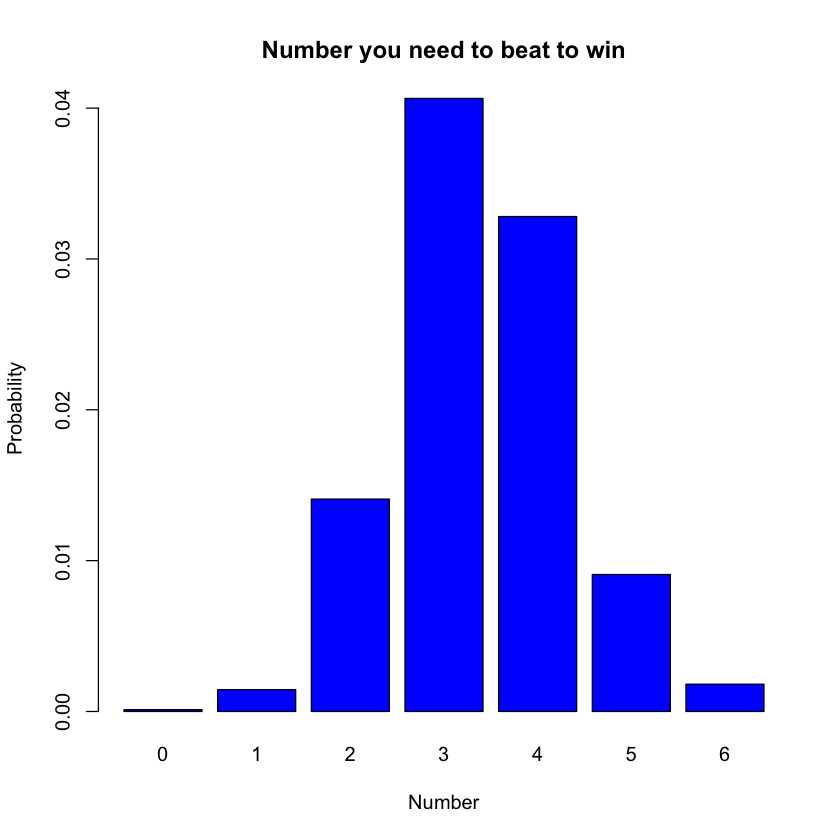

In [7]:
#plot barchart for number you need to beat to win
highest_non_winner=as.numeric(highest_non_winner)
counts=table(highest_non_winner)
barplot(counts/(sum(counts)*10),main="Number you need to beat to win",col="blue",
        xlab="Number",ylab="Probability")

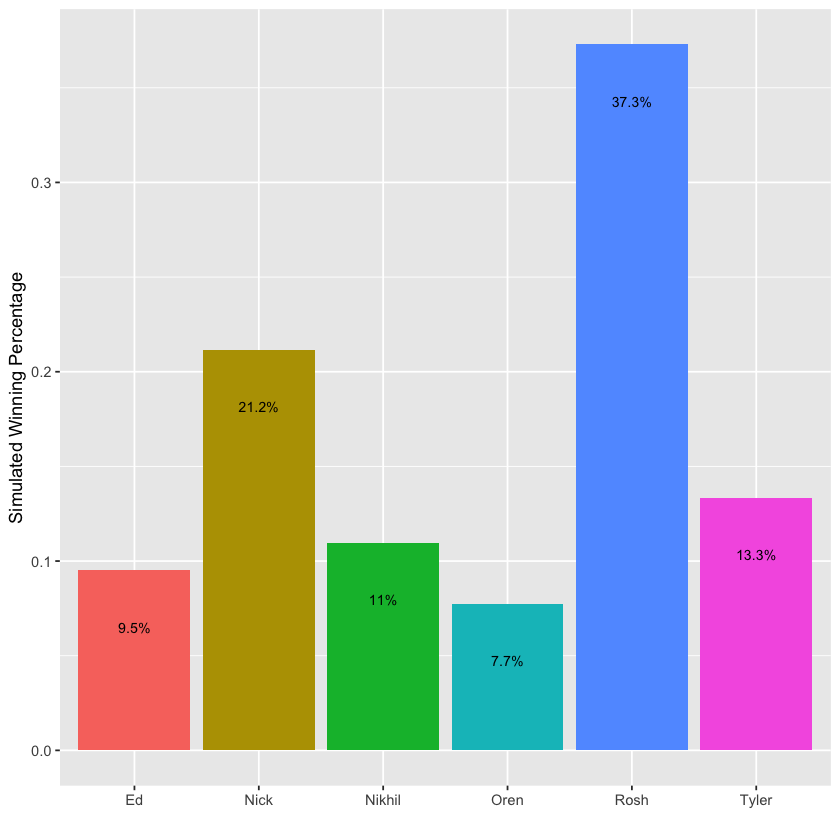

In [8]:
#plot barchart of winning percentages in simulation
ggplot(win_percentages,aes(x=names,y=percentages,fill=names)) + geom_bar(stat="identity")+
  labs(x="",y="Simulated Winning Percentage") + theme(legend.position="none")+
  geom_text(aes(label=paste(round(percentages*100, digits=1),"%",sep="")),size=3,nudge_y=-0.03)